<a href="https://colab.research.google.com/github/belhouariayoub/PROJETEMBIA/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys, os, array, time
import numpy as np
import matplotlib.pyplot as plt
import IPython

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dropout,Dense
from sklearn.model_selection import train_test_split
from tensorflow.python.ops.gen_array_ops import mirror_pad_eager_fallback


In [4]:
def build_model():

 
        # Small CNN for MNIST recognition
        model = models.Sequential()
        
        # Dense layer
        model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(62,64,3)))
       # model.add(layers.MaxPooling2D((2, 2), padding='valid'))


        model.add(layers.Conv2D(32, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2), padding='valid'))
        model.add(Dropout(0.2))     

       

        model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
      #  model.add(layers.MaxPooling2D((2, 2), padding='valid'))
       # model.add(Dropout(0.2))     


        model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
        model.add(layers.MaxPooling2D((2, 2), padding='valid'))
        model.add(Dropout(0.2)) 

        model.add(layers.Flatten())
        model.add(layers.Dense(512, activation='relu'))
        model.add(Dropout(0.2))    
              
        # Output layer
        model.add(layers.Dense(4, activation='softmax'))
        model.summary()  
     


        return model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/EMBEDDEDIA"

In [6]:
!ls

Saline_bottle_original_size	 test.h5     Y_data.npy
Saline_bottle_original_size_50%  X_data.npy


In [13]:
X_data = []
Y_data = []
X_data=np.load('X_data.npy')
Y_data=np.load('Y_data.npy')

x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data, test_size=0.20, random_state=4)
x_train.reshape(64,64,3,-1)
x_test.reshape(64,64,3,-1)
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)


# Small CNN for MNIST recognition
model = models.Sequential()
        
# Dense layer
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(64,64,3)))
# model.add(layers.MaxPooling2D((2, 2), padding='valid'))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), padding='valid'))
model.add(Dropout(0.2))     
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), padding='valid'))
model.add(Dropout(0.2)) 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))    
model.add(layers.Dense(4, activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=20, validation_data=(x_test,y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 31, 31, 64)        36928     
                                                      

27/27 - 3s - loss: 0.4614 - accuracy: 0.8898 - 3s/epoch - 125ms/step


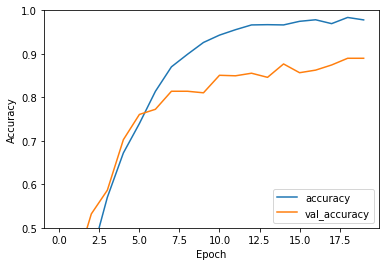

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

In [ ]:
model.save_weights('test.h5')
